# 04. 분류

### [3] 앙상블 학습
### [앙상블 학습 개요]
앙상블 학습(Ensemble Learning)을 통한 분류 : 여러 개의 분류기를 생성하고 그 예측을 도출하는 기법

- 보팅(Voting) : 일반적으로 서로 다른 알고리즘을 가진 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 배깅(Bagging) : 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가는 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식 (랜덤 포레스트 알고리즘)
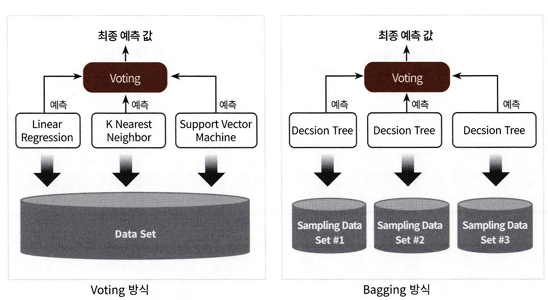


- 부스팅(Boosting) : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것

### [보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)]
- 하드 보팅(Hard Voting) : 다수결 원칙과 비슷, 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
- 소프트 보팅(Soft Voting) : 분류기들의 레이블 값 결정 확률의 평균 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정
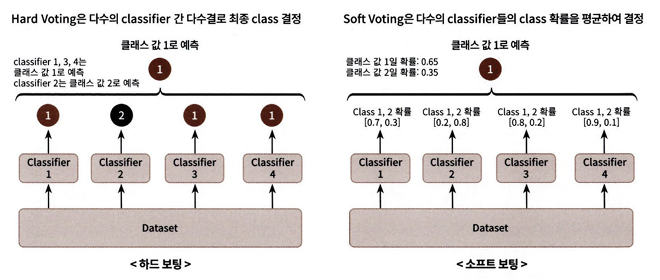


### [보팅 분류기(Voting Classifier 클래스)]
- 사이킷런의 VotingClassifier 클래스 : 보팅 방식의 앙상블을 구현한 클래스

위스콘신 유방암 데이터 세트를 예측 분석
- 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트
- 종양의 크기, 모양 등의 형태와 관련한 많은 피처

In [13]:
# 위스콘신 데이터 세트 살펴보기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [14]:
# 로지스틱 회귀와 KNN을 기반으로 소프트 보팅 방식으로 새롭게 보팅 분류기 생성

# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}', format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0}정확도:{1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : {0:.4f} 0.956140350877193
LogisticRegression정확도:0.9474
KNeighborsClassifier정확도:0.9386


### [4] 랜덤 포레스트
### [랜덤 포레스트의 개요 및 실습]
- 배깅 : 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘
- 배깅의 대표적인 알고리즘 : 랜덤 포레스트

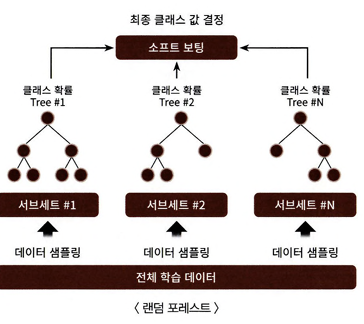

- 부트스트래핑(bootstrapping) 분할 방식 : 개별적인 분류기의 기반 알고리즘은 결정 트리, 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 분리하는 것

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/features.txt', sep='\s+', header=None, names=['column_index','column_name'])

# 피처명 index를 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [17]:
# 원본  피처명에 _1 또는 _2 를 추가로 부여하여 새로운 피처명을 반환하는 함수 생성

def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)

  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [18]:
import pandas as pd

def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/features.txt', sep='\s+',
                                  header = None, names = ['column_index', 'column_name'])

    # 중복된 피처명으 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/X_train.txt', sep = '\s+', names=feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/X_test.txt', sep = '\s+', names=feature_name)

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    y_train = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {0:.4f}'. format(accuracy))

랜덤 포레스트 정확도 : 0.9196


### [랜덤 포레스트 하이퍼 파라미터 및 튜닝]
GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝하기

In [20]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8,16,24],
    'min_samples_leaf' : [1,6,12],
    'min_samples_split' : [2,8,16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}', format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도 : {0:.4f} 0.9164853101196953


In [21]:
# 추출된 최적 하이퍼 파라미터로 다시 RandomForestClassifier를 학습시킨 뒤 별도의 테스트 데이터 세트에서 예측 성능을 측정
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9260


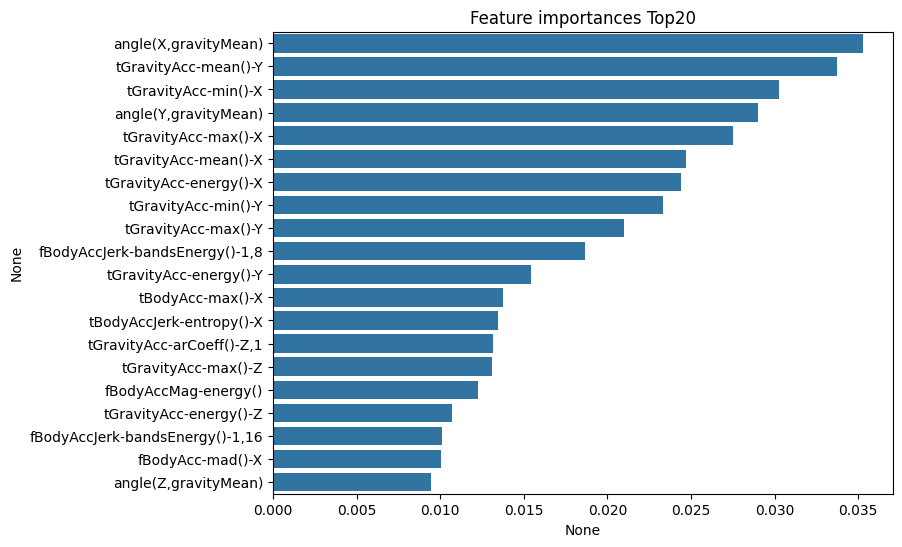

In [22]:
# 알고리즘이 선택한 피처의 중요도를 막대그래프로 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### [5] GBM(Gradient Boosting Machine)
### [GBM의 개요 및 실습]
부스팅 알고리즘 : 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 그래디언트 부스트
- Ada Boost : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

에이다부스타의 학습 진행 방식

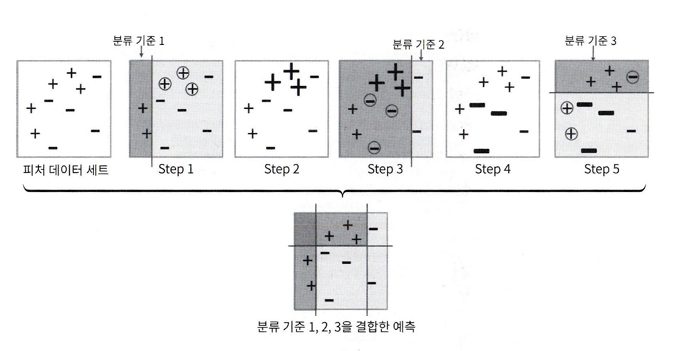



맨 왼쪽 그림과 같이 +와 -로 된 피처 데이터 세트가 있을 때
- [step1] 첫 번째 약한 학습기가 분류 기준 1로 +와 -를 분류 (동그라미+ : +데이터가 잘못 분류된 오류 데이터)
- [step2] 오류 데이터에 대해 가중치 값 부여 -> 가중치가 부여된 오류 + 데이터 : 다음 약한 학습기가 더 잘 분류할 수 있게 크기가 커짐
- [step3] 두 번째 약한 학습기가 분류 기준 2로 +와 -를 분류 (동그라미- : 잘못 분류된 오류 데이터)
- [step4] 잘못 분류된 이 - 오류 데이터에 대해 더 큰 가중치를 부여
- [step5] 세 번째 약한 학습기가 분류 기준 3로 +와 -를 분류 (약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측을 수행함)
- [결과] 첫 번째, 두 번째, 세 번째 약한 학습기를 모두 결합한 결과 예측, 개별 약한 학습기보다 더 높아진 정확도

GBM : 가중치 업데이트를 경사 하강법을 이용
- 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법

In [23]:
# GBM 이용해 사용자 행동 데이터 세트를 예측 분류

from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'. format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

GBM 정확도 : 0.9386
GBM 수행 시간: 1221.3초


### [GBM 하이퍼 파라미터 소개]
- loss : 경사 하강법에서 사용할 비용 함수를 지정
- learning_rate : GBM에서 학습을 진행할 때마다 적용하는 학습률
- n_estimators : weak learner의 개수
- subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율

### [6] XGBoost(eXtra Gradient Boost)
### [XGBoost 개요]
XGBoost의 장점

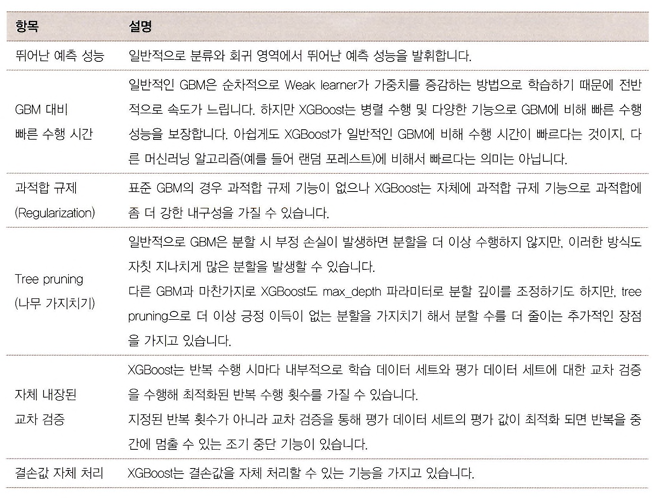

- XGBoost 프레임워크 기반의 XGBoost : 파이썬 래퍼 XGBoost 모듈
- 사이킷런과 연동되는 모듈 : 사이킷런 래퍼 XGBoost 모듈

### [XGBoost 설치하기]

In [24]:
pip install xgboost==1.5.0

In [25]:
import xgboost as xgb
from xgboost import XGBClassifier

### [파이썬 래퍼 XGBoost 하이퍼 파라미터]
- 파이썬 래퍼 XGBoost 모듈과 사이킷런 래퍼 XGBoost 모듈의 일부 하이퍼 파라미터는 약간 다름

파이썬 래퍼 XGBoost 하이퍼 파라미터
- 일반 파라미터
- 부스터 파라미터
- 학습 태스크 파라미터

In [26]:
import xgboost
print(xgboost.__version__)

1.5.0


### [파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측]
위스콘신 유방암 데이터 세트를 활용해 파이썬 래퍼 XGBoost API 사용법 살펴보기

위스콘신 유방암 데이터 세트
- 종양의 크기, 모양 등의 다양한 속성값을 기반
- 악성 종양(malignant)인지 양성 종양(benign)인지를 분류

In [27]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

# 종양의 크기와 모양에 관련한 속성이 숫자형
# 타킷 레이블 값의 종류는 악성인 'malignant'가 0값, 양성인 'benign'이 1값
cancer_df = pd.DataFrame(data = features, columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [28]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [29]:
# 데이터세트의 80%를 학습용, 20%를 테스트용
# 80%의 학습용 데이터에서 90%를 최종 학습용, 10%를 검증용으로 분할

# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


파이썬 래퍼 XGBoost 특징
- XGBoost만의 전용 데이터 객체인 DMatrix를 사용함
- 학습용, 검증, 테스트용 데이터 세트를 모두 전용의 데이터 객체인 DMatirx로 생성하여 모델에 입력
- DMatrix 입력 파라미터  : data(피처 데이터 세트), label(분류의 경우 레이블 데이터 세트, 회귀의 경우 숫자형인 종속값 데이터 세트)

DataFrame 기반의 학습 데이터 세트와 테스트 데이터 세트를 DMatrix로 변환

In [32]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환
# 학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr.values, label=y_tr.values)
dval = xgb.DMatrix(data=X_val.values, label=y_val.values)
dtest = xgb.DMatrix(data=X_test.values, label=y_test.values)

XGBoost의 하이퍼 파라미터를 설정
- 주로 딕셔너리 형태

In [33]:
# XGBoost의 하이퍼 파라미터를 설정

params = {'max_depth' : 3,
          'eta':0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
          }
num_rounds = 400

하이퍼 파라미터로 XGBoost 모델을 학습 시키기
- 파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost 모듈의 train() 함수에 파라미터로 전달
- 학습 시 XGBoost는 수행 속도를 개선하기 위해서 조기 중단 기능을 제공
- 조기 중단 : XGBoost가 수행 성능을 개선하기 위해서 더 이상 지표 개선이 없을 경우에 num_boost_round 횟수를 모두 채우지 않고 중간에 반복을 빠져 나올 수 있도록 하는 것
- 조기 중단 : early_stopping_rounds 파라미터 입력해서 설정
- 조기 중단의 성능 평가 : 별도의 검증 데이터 세트를 이용
- 반목마다 지정된 평가용 데이터 세트에서 eval_metirc의 지정된 평가 지표로 예측 요류를 측정함

xgboost 모듈의 train() 함수를 호출하면 학습을 수행

In [34]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기
eval_list = [(dtr, 'train'),(dval,'eval')] #또는 eval_list = [(dval,'eval')]만 명기해도 무방

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round = num_rounds,
                      early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

- 반복 시마다 train-logloss와 eval-logloss가 지속적으로 감소
- num_boost_round = 400이지만 176번만 반복

xgboost를 이용해 모델의 학습이 완료됐으면 이를 이용해 테스트 데이터 세트에 예측을 수행하기
- xgboost의 predict() 메서드 이용 : 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환함


In [35]:
 pred_probs = xgb_model.predict(dtest)
 print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
 print(np.round(pred_probs[:10],3))

 # 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
 preds = [1 if x>0.5 else 0 for x in pred_probs]
 print('예측값 10개만 표시 :' ,preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시 : [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [36]:
# 3장 평가에서 생성한 get_clf_eval() 함수 적용
# XGBoost 모델의 예측 성능을 평가

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred = None, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score (y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0: .4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\ F1: {3:.4f}, AUC:{4:.4f}'. format(accuracy, precision, recall, f1, roc_auc))

In [37]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도:  0.9561, 정밀도: 0.9615, 재현율: 0.9740,\ F1: 0.9677, AUC:0.9937


xgboost 패키지에 내장된 시각화 기능 수행하기
- plot_importance() : 피처의 중요도를 막대그래프 형식으로 나타냄, f 스코어를 기반으로 해당 피처의 중요도를 나타냄
- 넘파이에서 피처명을 제대로 알 수 없음 => Y축의 피처명 나열시 피처 순서별로 f0, f1, ,,, 로 나타냄

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

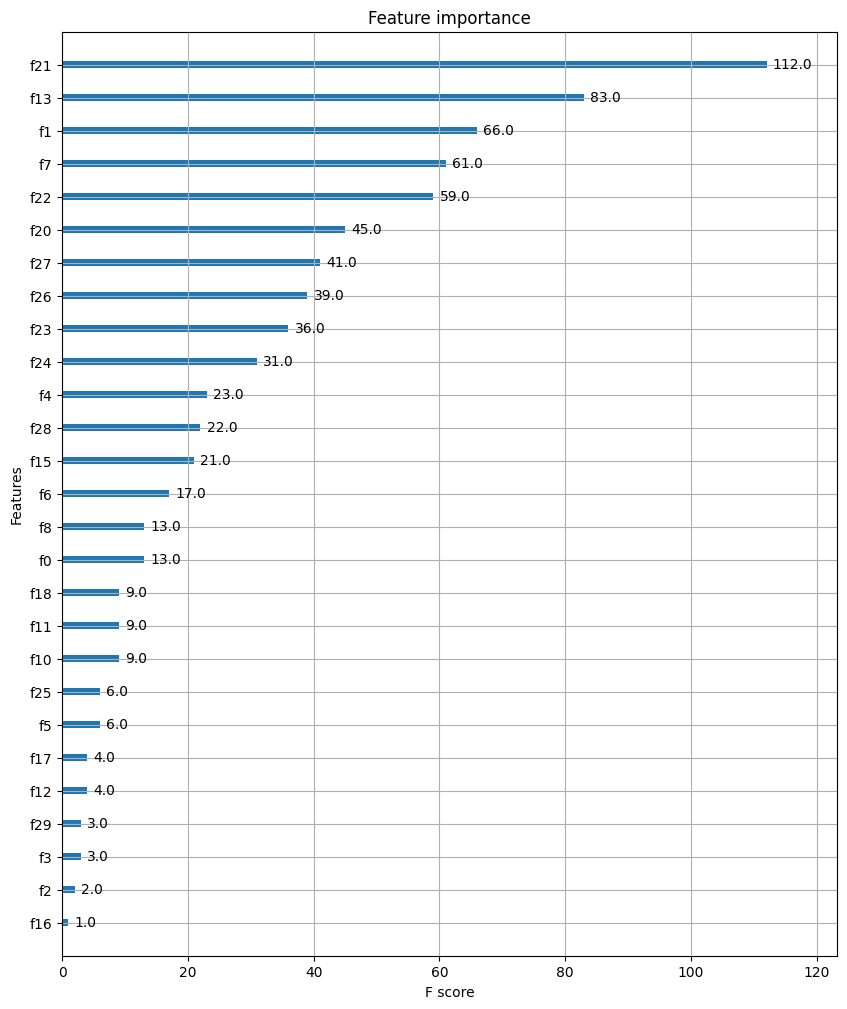

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax=ax)

결정 트리의 트리 기반 규칙 구조 시각화
- to_graphviz() : 규칙 트리 구조 그리기

cv()
-  데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구하는 방법 제공
```
 xgboost.cv(params, dtrain, num_boost_ro나nd=10, nfold=3, stratified=False, folds=Nonez metrics=(),
obj=None, feval=None, maximize=False, early_stopping_rounds=Non은, fpreproc=None, as_pandas=True,
verbose_eval=None, show_stdv=True, seed=Gz callbacks=None, shuffle=True)
```



### [사이킷런 래퍼 XGBoost의 개요 및 적용]
- 분류 : XGBClassifier, 회귀 : XGBRegressor
- 파이썬 래퍼 XGBoost와 사이킷런 래퍼 XGBoost의 하이퍼 파라미터에 약간의 차이가 존재
 - eta -> learning_rate
 - sub_sample -> subsampler
 - lambda -> reg_lambda
 - alpha -> reg_alpha

 위스콘신 대학병원의 유방암 데이터 세트를 분류를 위한 래퍼 클래스인 XGBClassifier를 이용해 예측하기

In [40]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메세지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators = 400, learing_rate = 0.05, max_depth=3, eval_metric = 'logloss')
xgb_wrapper.fit(X_train.values, y_train.values, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[07:39:53] WARNING: ../src/learner.cc:576: 
Parameters: { "learing_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [41]:
# 사이킷런 래퍼 XGBOsst로 만들어진 모델의 예측 성능 평가하기
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도:  0.9737, 정밀도: 0.9744, 재현율: 0.9870,\ F1: 0.9806, AUC:0.9961


=> 앞 예제의 파이썬 래퍼 XGBoost보다 더 좋은 평가
- 위스콘신 데이터 세트의 개수는 작은데,
- 이전에 조기 중단을 위해서 최초 학습 데이터인 X_train을 다시 학습용 X_tr과 X_val로 분리하면서 최종 학습 데이터 건수가 작아지기 때문

사이킷런 래퍼 XGBoost에서 조기 중단을 수행
- 파라미터
 - early_stopping_rounds : 평가 지표가 향상될 수 있는 반복 횟수를 정의
 - eval_metirc :평가 지표
 - eval_set : 성능 평가를 수행할 데이터 세트

In [47]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=50, eval_metric='logloss')
evals=[(X_tr.values, y_tr.values),(X_val.values,y_val.values)]
xgb_wrapper.fit(X_tr.values, y_tr.values, eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[07:43:45] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	val

In [48]:
# 조기중단으로 학습된 XGBClassifier의 예측성능 살펴보기
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도:  0.9561, 정밀도: 0.9615, 재현율: 0.9740,\ F1: 0.9677, AUC:0.9951


조기 중단값을 너무 급격하게 줄이면 예측 성능 저하가 우려됨
- 10번 반복하게 하기

In [50]:
# early_stopping_rounds를 10으로 설정하고 재학습

xgb_wrapper.fit(X_tr.values, y_tr.values, early_stopping_rounds = 10, eval_metric='logloss',
                eval_set = evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[07:44:34] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	val

=> 50일 때보다 낮은 정확도

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

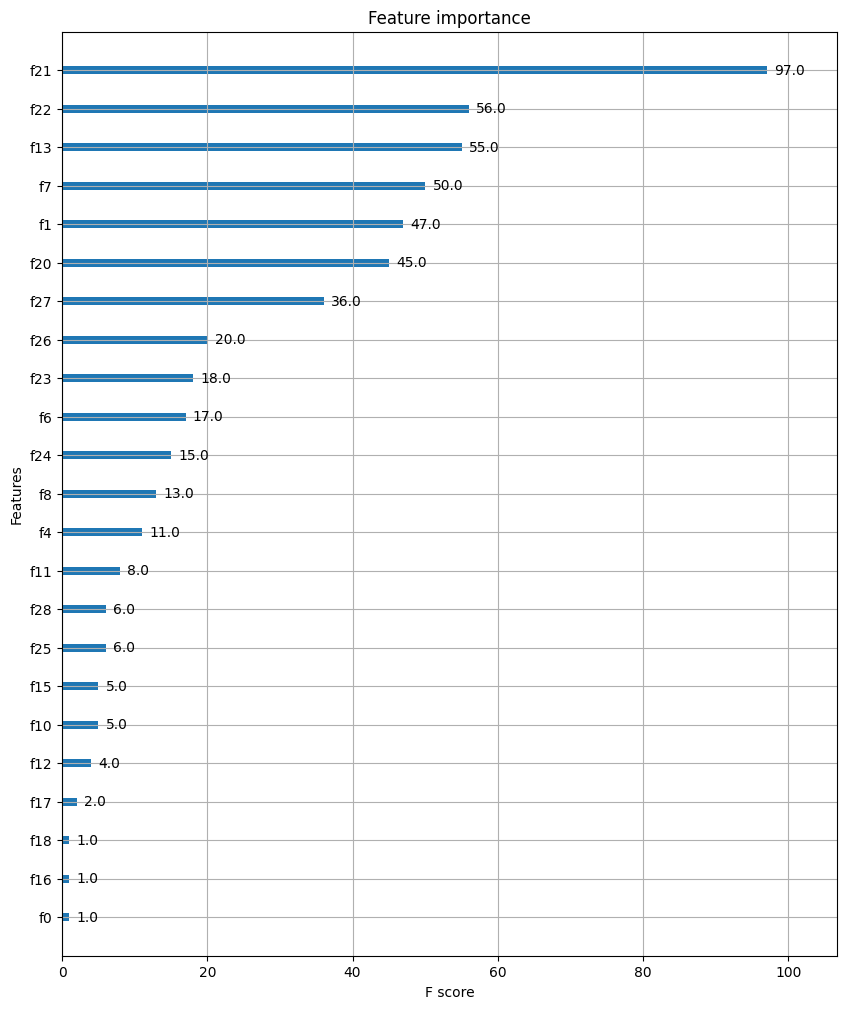

In [51]:
# plot_importance() 시각화 결과 도출하기
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))

# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)